In [1]:
!pip install -U imbalanced-learn
!pip install imblearn
!pip install imblearn
!pip install -c glemaitre imbalanced-learn
!pip install imblearn==0.

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'
ERROR: Invalid requirement: 'imblearn==0.': Expected end or semicolon (after version specifier)
    imblearn==0.
            ~~~^


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# loading important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
import itertools

%matplotlib inline
matplotlib.style.use('ggplot')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [3]:
# Reading the dataset
sales_data = pd.read_csv("/content/SalesKaggle3.csv")

In [4]:
# Gist of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [5]:
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [6]:
#Statistical description of the dataset
sales_data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [7]:
# Includes categorical variable
sales_data.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [8]:
print(sales_data.isna().sum())

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


In [9]:
# the code replaces all na values with mean of the column
sales_data['SoldFlag'].fillna(sales_data['SoldFlag'].mean(), inplace=True)
sales_data['SoldCount'].fillna(sales_data['SoldCount'].mean(), inplace=True)


In [10]:
# Splitting the historical and active state
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

In [11]:
print(sales_data.isnull().sum())

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64


In [12]:
sales_data.drop_duplicates(inplace=True)

In [22]:
# Find and display duplicate rows
duplicates = sales_data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
198912    False
198913    False
198914    False
198915    False
198916    False
Length: 198917, dtype: bool


In [13]:
sales_data

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.000000,0.000000,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.000000,0.000000,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.000000,0.000000,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.000000,1.000000,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.000000,1.000000,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,0.171009,0.322306,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,0.171009,0.322306,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,0.171009,0.322306,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,0.171009,0.322306,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


In [14]:
# Basic questions about the dataset

# 1. Number of enteries
print(sales_data.shape)
# We have 198917 rows and 14 columns

# 2. Total number of products & unique values of the columns
print("*****************")
print(sales_data.nunique())

# 3. Count of the historical and active state
print("*****************")
print(sales_data[sales_data['File_Type'] == 'Historical']['SKU_number'].count())
print(sales_data[sales_data['File_Type'] == 'Active']['SKU_number'].count())

# 3.1 Split the dataset into two parts based on the file_type
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

(198917, 14)
*****************
Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 3
SoldCount               38
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64
*****************
75996
122921


<Axes: title={'center': 'Frequency distribution of Marketing Type'}, ylabel='MarketingType'>

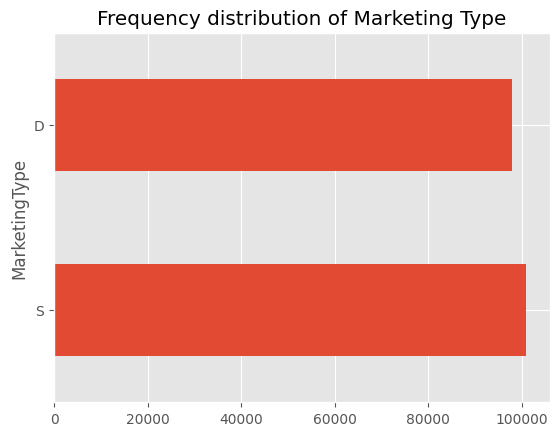

In [15]:
sales_data['MarketingType'].value_counts().plot.barh(title="Frequency distribution of Marketing Type")



<Axes: title={'center': 'Proportion of File Type'}, ylabel='count'>

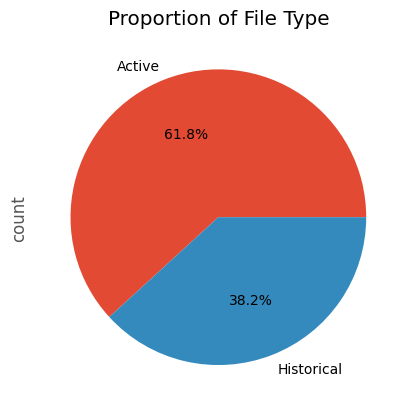

In [ ]:
sales_data['File_Type'].value_counts().plot.pie(title="Proportion of File Type", autopct='%1.1f%%')


<Axes: title={'center': 'Donut Chart of New Release Flag'}, ylabel='count'>

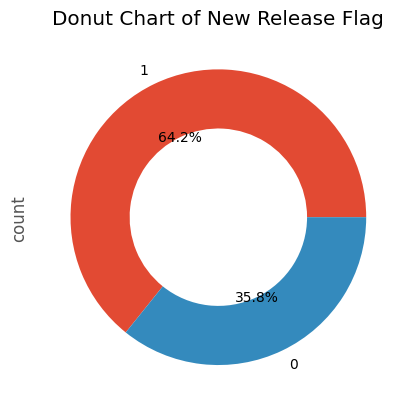

In [ ]:
sales_data['New_Release_Flag'].value_counts().plot.pie(wedgeprops=dict(width=0.4), title="Donut Chart of New Release Flag", autopct='%1.1f%%')

<Axes: title={'center': 'Proportion of Marketing Type - Historical States'}, ylabel='MarketingType'>

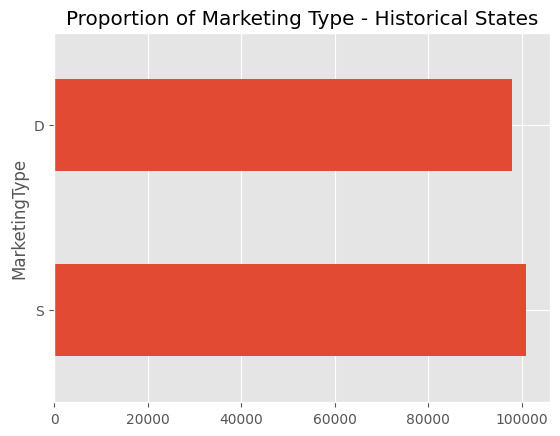

In [ ]:
sales_data['MarketingType'].value_counts().plot.barh(title="Proportion of Marketing Type - Historical States")

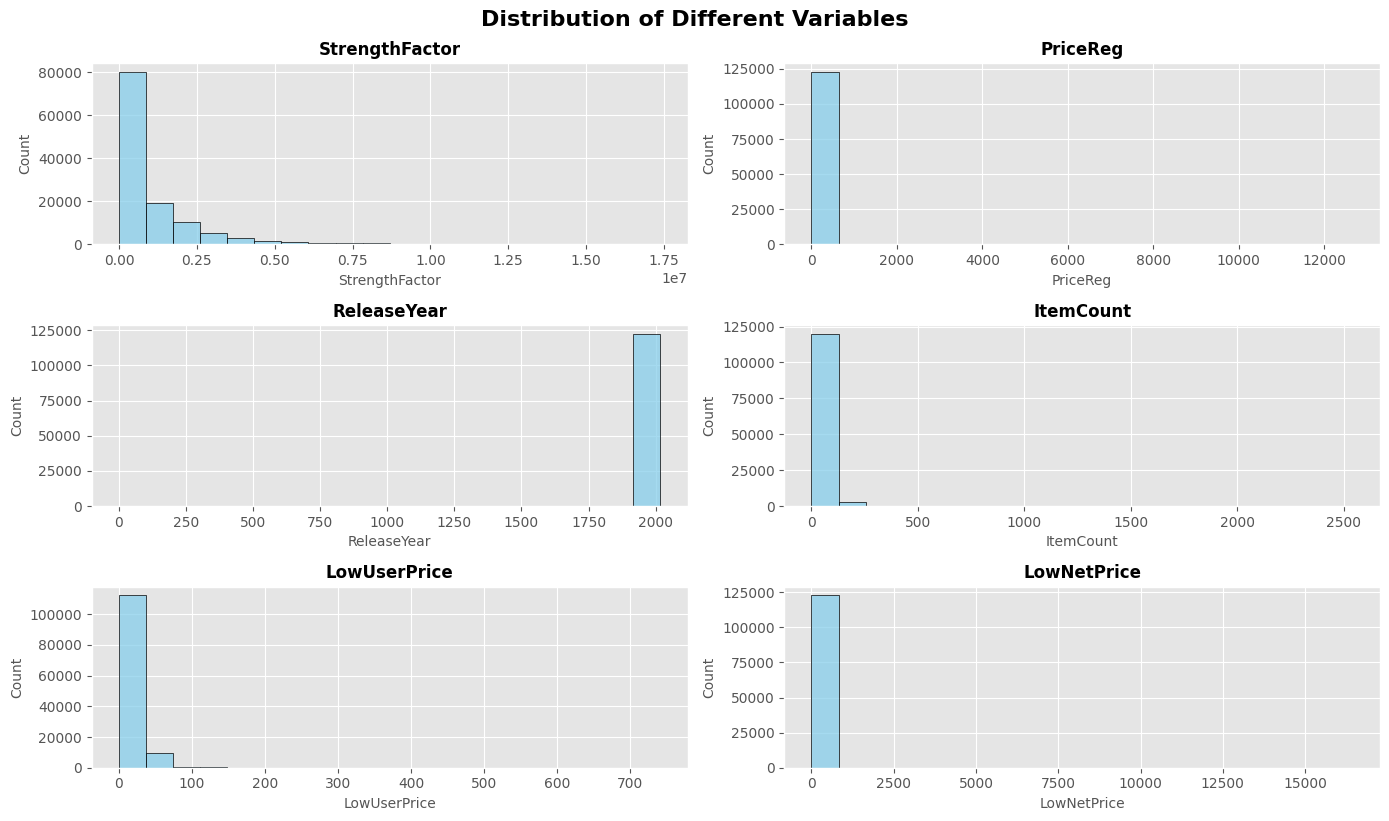

In [ ]:
# Column names to plot
col_names = ['StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

# Set up the matplotlib figure with a grid layout
n = len(col_names)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows in the grid

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), sharex=False, sharey=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(col_names):
    sns.histplot(sales_data_act[col], bins=20, kde=False, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=12, weight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()
plt.suptitle('Distribution of Different Variables', fontsize=16, weight='bold', y=1.02)
plt.show()

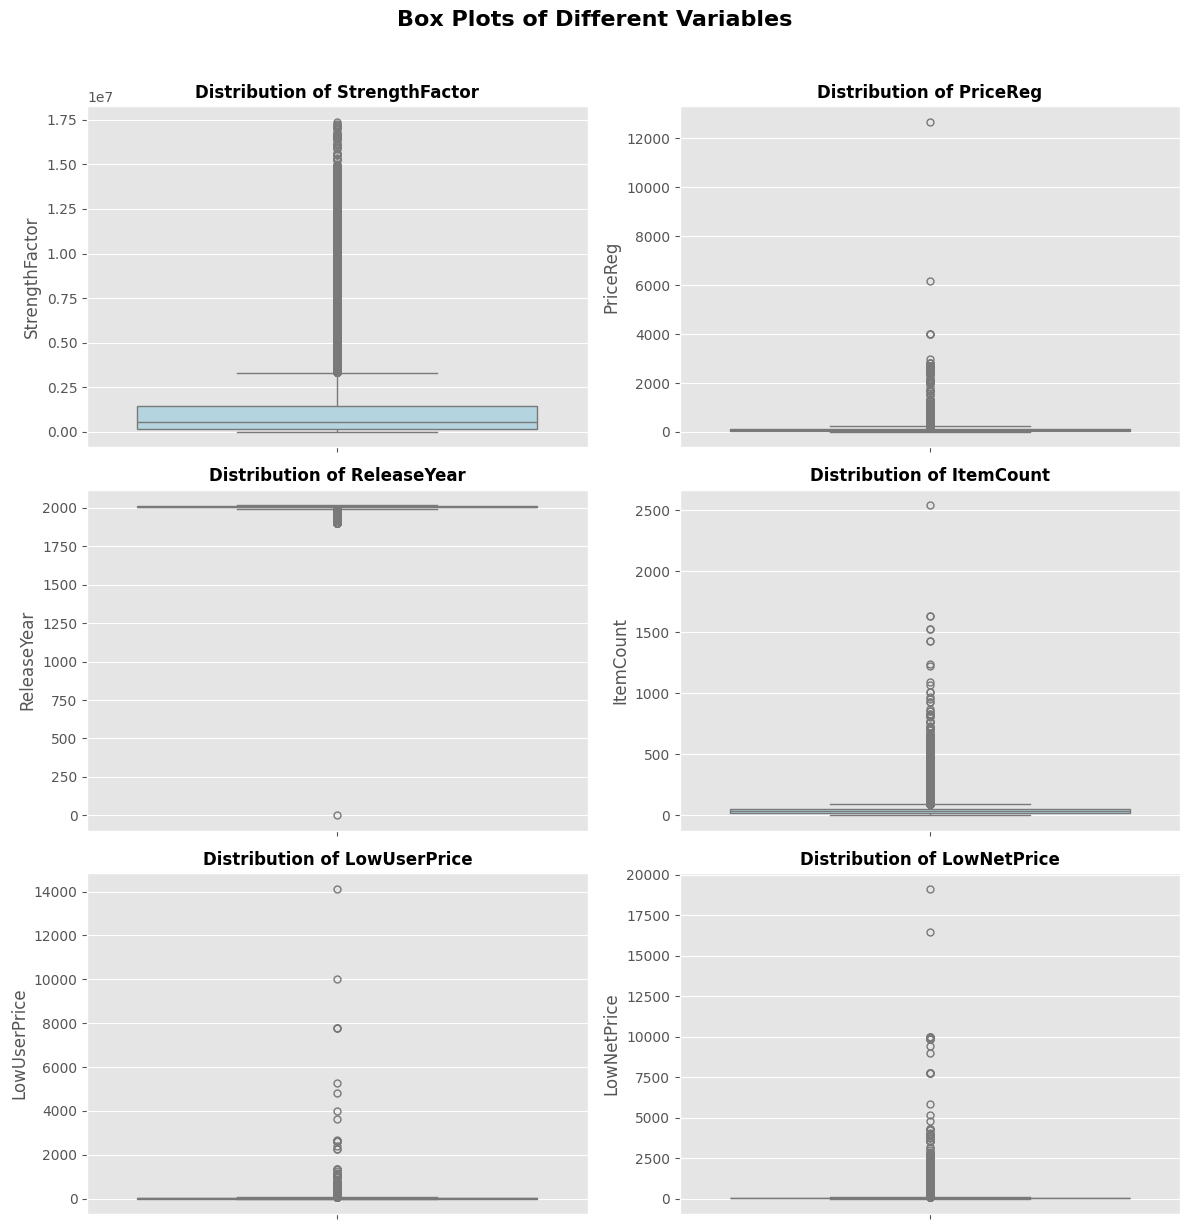

In [ ]:
# Column names to plot
col_names = ['StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

# Set up the matplotlib figure with a grid layout
n = len(col_names)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows in the grid

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12), squeeze=False)

# Flatten the 2D axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(col_names):
    sns.boxplot(y=sales_data[col], ax=axes[i], color='lightblue', fliersize=5)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')

# Add a descriptive title for the entire figure
fig.suptitle('Box Plots of Different Variables', fontsize=16, weight='bold', y=1.02)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

<ipython-input-26-66bb086dc6e9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[i], rug=True, hist=False)
<ipython-input-26-66bb086dc6e9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[i], rug=True, hist=False)
<ipython-input-26-66bb086dc6e9>:13: UserWarn

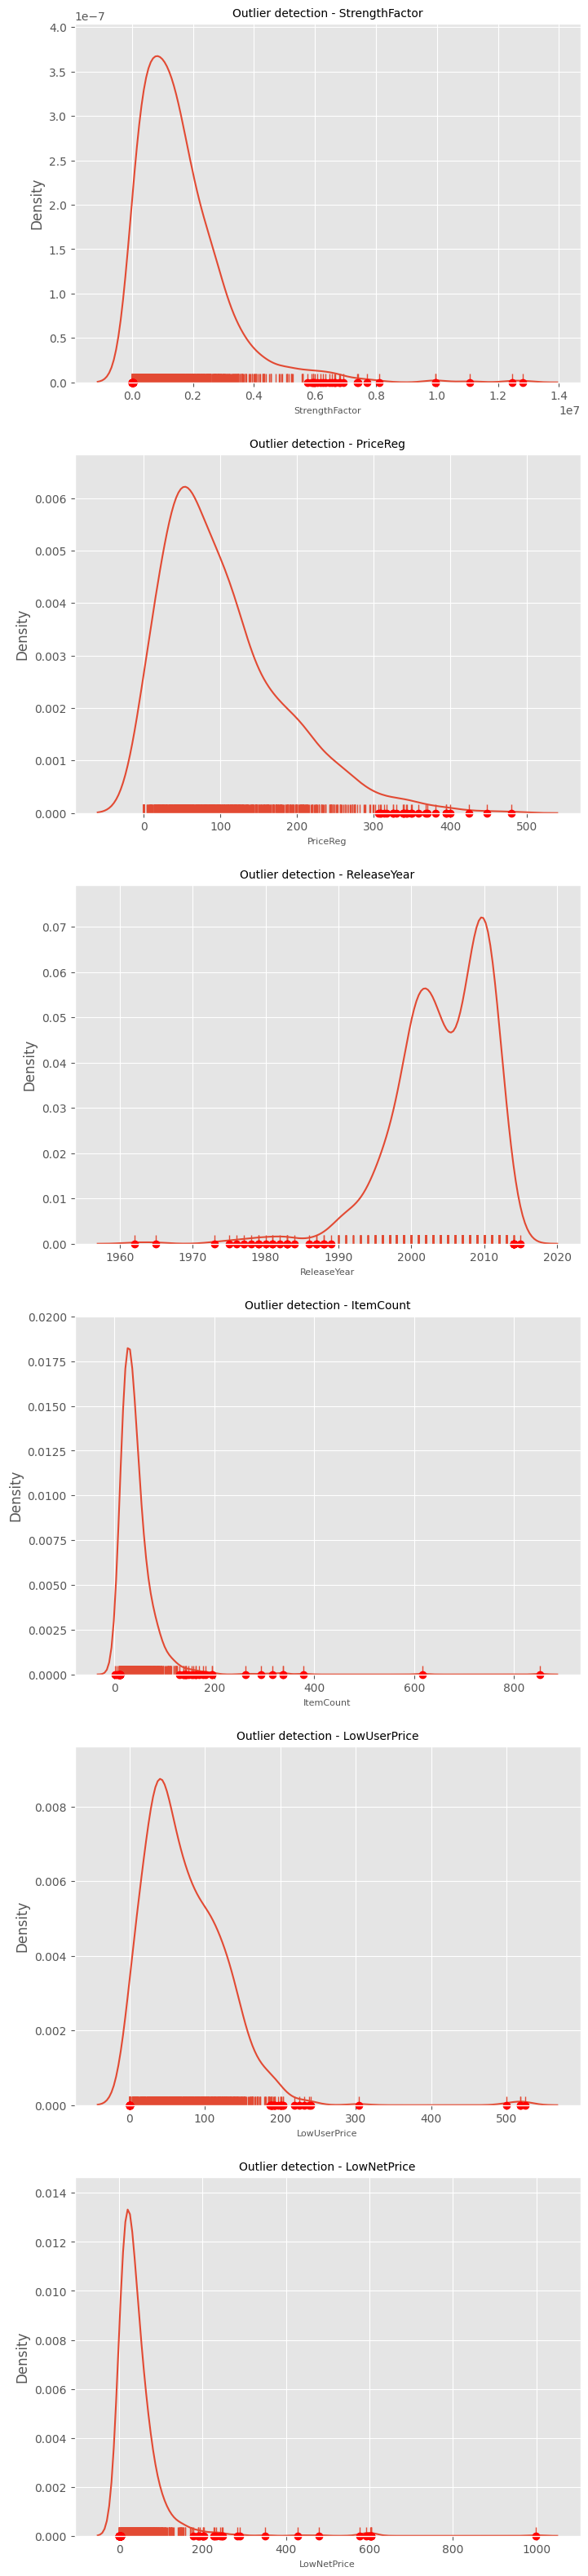

In [ ]:
# Percentile based outlier removal
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = sales_data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# Converting marketing type to categorical variable
sales_data['MarketingType'] = sales_data['MarketingType'].astype('category')
sales_data['MarketingType'] = sales_data['MarketingType'].cat.codes

# Splitting the historical and active state
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

In [ ]:
# Columns to remove
remove_col_val = ['Order', 'File_Type', 'SKU_number', 'SoldCount', 'ReleaseNumber', 'SoldFlag']

y = sales_data_hist['SoldFlag']

sales_data_hist = sales_data_hist.drop(remove_col_val, axis=1)
sales_data_act = sales_data_act.drop(remove_col_val, axis=1)

# create training and testing vars
training_features, testing_features, training_target, testing_target = train_test_split(sales_data_hist, y, test_size=0.2)
print(training_features.shape, training_target.shape)
print(testing_features.shape, testing_target.shape)

(60796, 8) (60796,)
(15200, 8) (15200,)


In [ ]:
print("Class 0 numbers: " , len(training_target[training_target==0.0]))
print("Class 1 numbers: " , len(training_target[training_target==1.0]))

Class 0 numbers:  50362
Class 1 numbers:  10434


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [ ]:
# Balancing the classes using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print("Class 0 numbers: " , len(y_train_res[y_train_res==0.0]))
print("Class 1 numbers: " , len(y_train_res[y_train_res==1.0]))

Class 0 numbers:  45314
Class 1 numbers:  45314


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
y_pred = clf_rf.predict(x_val)

In [ ]:
report = classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.79      0.84      5048
     Class 1       0.35      0.56      0.43      1032

    accuracy                           0.75      6080
   macro avg       0.62      0.67      0.63      6080
weighted avg       0.80      0.75      0.77      6080



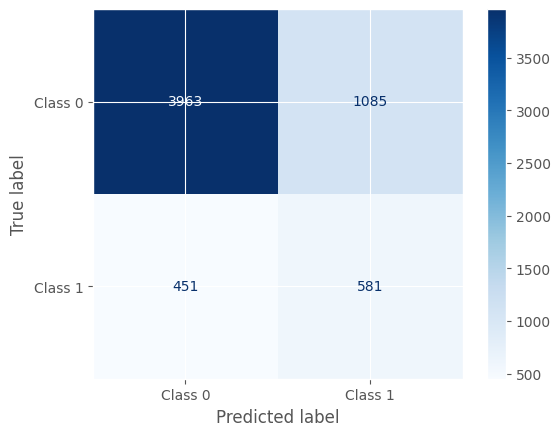

In [ ]:
# Compute and display confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')

In [ ]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

pred = clf_rf.predict(testing_features)

print('\nTest Results')
print(clf_rf.score(testing_features, testing_target))
print(recall_score(testing_target, pred))

print('\nROC AUC score')
print(roc_auc_score(testing_target, pred))

Validation Results
0.7473684210526316
0.562984496124031

Test Results
0.7432894736842105
0.5441061670569868

ROC AUC score
0.6638872345017486


Confusion matrix, without normalization
[[9904 2734]
 [1168 1394]]
Normalized confusion matrix
[[0.78 0.22]
 [0.46 0.54]]


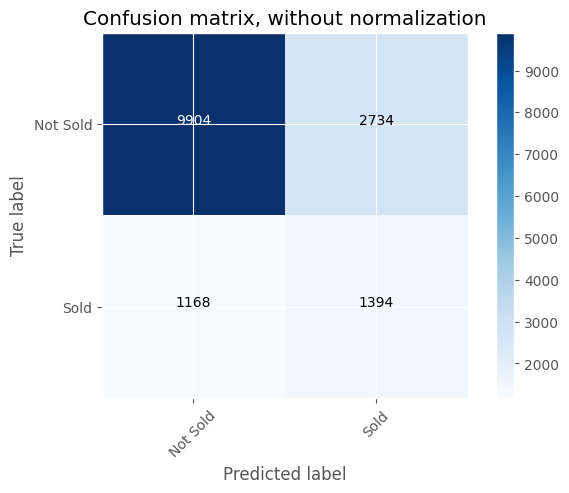

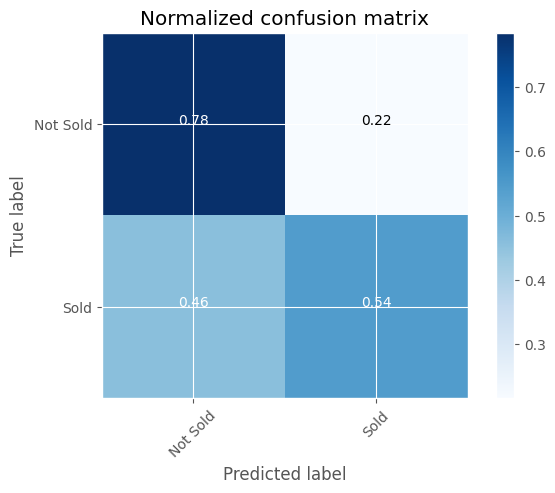

In [ ]:
class_names = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ROC

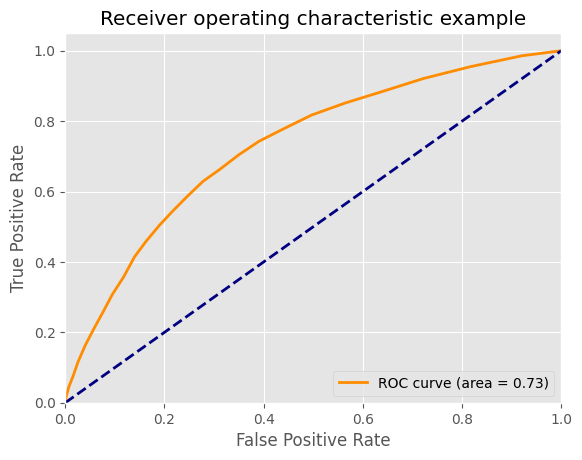

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_rf.predict_proba(testing_features)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testing_target.ravel(), y_score[:,1].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_predictions = dt_model.predict(x_val)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_val, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.75


In [ ]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
nb_predictions = nb_model.predict(x_val)

In [ ]:
# Evaluate accuracy
nb_accuracy = accuracy_score(y_val, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.82


In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:44:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Make predictions
xgb_predictions = xgb_model.predict(x_val)

In [ ]:
# Evaluate accuracy
xgb_accuracy = accuracy_score(y_val, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

XGBoost Accuracy: 0.84


In [ ]:
import math

# EOQ formula: EOQ = sqrt((2 * D * S) / H)
# D = Demand (annual sales volume)
# S = Order cost (cost per order)
# H = Holding cost (cost to hold one unit in inventory per year)

def calculate_eoq(demand, order_cost, holding_cost):
    eoq = math.sqrt((2 * demand * order_cost) / holding_cost)
    return eoq

# Example parameters (customize these based on your data)
# Create a sample DataFrame (replace this with your actual data loading)
import pandas as pd
data = {'sales': [100, 200, 150, 300]}
df = pd.DataFrame(data)

annual_sales_volume = df['sales'].sum()  # Total demand (sum of sales data)
order_cost = 50  # Set based on business context
holding_cost = 10  # Set based on cost of holding inventory

eoq_value = calculate_eoq(annual_sales_volume, order_cost, holding_cost)
print(f"Optimal Order Quantity (EOQ): {eoq_value}")

Optimal Order Quantity (EOQ): 86.60254037844386
